# 3.12 处理时间序列

## 3.12.1 Python的日期与时间工具

1. 原生Python的日期与时间工具：datetime与dateutil

In [1]:
from datetime import datetime

In [2]:
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [3]:
from dateutil import parser

In [4]:
date = parser.parse("4th of July, 2015")

In [5]:
date

datetime.datetime(2015, 7, 4, 0, 0)

In [6]:
date.strftime('%A')

'Saturday'

2. 时间类型数组：Numpy的datetime64类型

In [7]:
import numpy as np

In [8]:
date = np.array('2015-07-04', dtype=np.datetime64)

In [9]:
date

array('2015-07-04', dtype='datetime64[D]')

In [10]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [11]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [12]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [13]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

3. Pandas的日期与时间工具：理想与现实的最佳解决方案

In [14]:
import pandas as pd

In [15]:
date = pd.to_datetime("4th of July, 2015")

In [16]:
date

Timestamp('2015-07-04 00:00:00')

In [17]:
date.strftime('%A')

'Saturday'

In [18]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [19]:
date + pd.to_timedelta(np.arange(12))

DatetimeIndex([          '2015-07-04 00:00:00',
               '2015-07-04 00:00:00.000000001',
               '2015-07-04 00:00:00.000000002',
               '2015-07-04 00:00:00.000000003',
               '2015-07-04 00:00:00.000000004',
               '2015-07-04 00:00:00.000000005',
               '2015-07-04 00:00:00.000000006',
               '2015-07-04 00:00:00.000000007',
               '2015-07-04 00:00:00.000000008',
               '2015-07-04 00:00:00.000000009',
               '2015-07-04 00:00:00.000000010',
               '2015-07-04 00:00:00.000000011'],
              dtype='datetime64[ns]', freq=None)

## 3.12.2 Pandas时间序列：用时间作索引

In [20]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'])

In [21]:
data = pd.Series([0, 1, 2, 3], index=index)

In [22]:
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [23]:
data['2014-07-04': '2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [24]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## 3.12.3 Pandas时间序列数据结构

In [25]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708'])

In [26]:
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [27]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [28]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

创建一个有规律的日期序列

In [29]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

日期范围可以是开始时间和周期数periods

In [30]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

通过freq参数改变时间间隔，默认值是D，这里改成H（小时）。

In [31]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

创建一个有规律的周期或时间间隔序列

In [32]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [33]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

## 3.12.4 时间频率与偏移量

可以将频率组合起来创建新的周期

In [34]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [35]:
from pandas.tseries.offsets import BDay

In [36]:
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## 3.12.5 重新取样、迁移和窗口

In [39]:
from pandas_datareader import data as web
import fix_yahoo_finance as yf
yf.pdr_override()

apple=web.DataReader('GOOG',data_source='yahoo',start='2004-01-01',end='2016-12-01')

In [40]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.693783,47.669952,49.676899,49.845802,44994500.0,49.845802
2004-08-20,54.187561,49.925285,50.178635,53.805050,23005800.0,53.805050
2004-08-23,56.373344,54.172661,55.017166,54.346527,18393200.0,54.346527
2004-08-24,55.439419,51.450363,55.260582,52.096165,15361800.0,52.096165
2004-08-25,53.651051,51.604362,52.140873,52.657513,9257400.0,52.657513


出于简化的目的，这里只用收盘价

In [41]:
goog = apple['Close']

In [42]:
goog.head()

Date
2004-08-19    49.845802
2004-08-20    53.805050
2004-08-23    54.346527
2004-08-24    52.096165
2004-08-25    52.657513
Name: Close, dtype: float64

In [43]:
%matplotlib inline

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

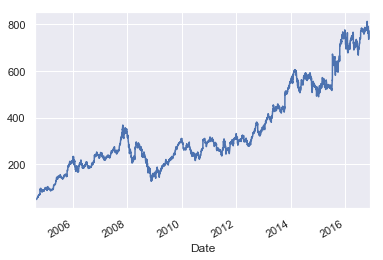

In [45]:
goog.plot()

1. 重新取样与频率转换

重新采样是指将时间序列从一个频率转换为另一个频率的过程。

将更高频率的数据聚合到低频率被称为向下采样，而从低频率转换到高频率称为向上采样。

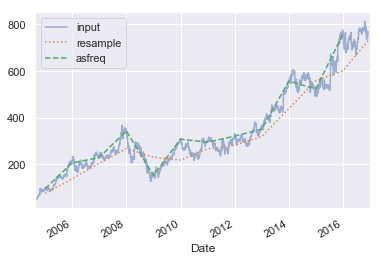

In [46]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'], loc='upper left')

下面将对工作日数据按天进行重新取样（即包含周末）。

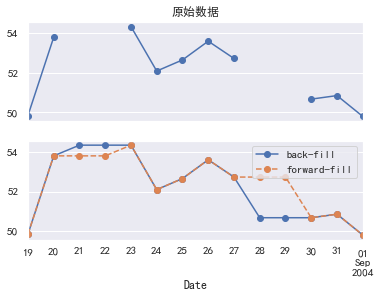

In [60]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）

fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')

ax[0].set_title("原始数据")

ax[1].legend(["back-fill", "forward-fill"], loc='upper right')

2. 时间迁移

下面我们将用shift()和tshift()这两种方法让数据迁移900天

shift()：迁移数据

tshift()：迁移索引

In [62]:
# 对数据应用时间频率，用向后填充解决缺失值。
goog = goog.asfreq('D', method='pad')

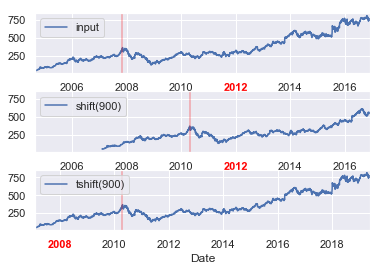

In [75]:
fig, ax = plt.subplots(3, sharey=True)

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# 设置图例与标签
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red')

plt.subplots_adjust(hspace=0.3)

计算股票一年期的投资回报率

Text(0,0.5,'% Return on Investment')

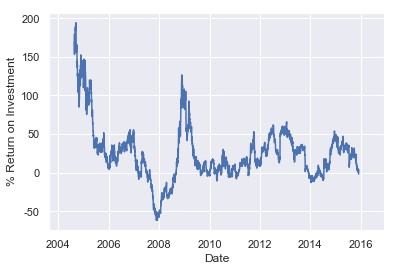

In [80]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment')

3. 移动时间窗口

In [81]:
rolling = goog.rolling(365, center=True)

In [82]:
data = pd.DataFrame({'input': goog,
                    'one-year rolling_mean': rolling.mean(),
                    'one-year rolling_std': rolling.std()})

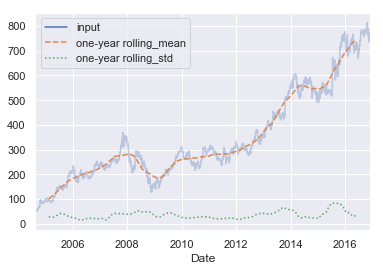

In [86]:
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

移动平均值，就是指定时间段，对时间序列数据进行移动计算平均值。移动平均值常常用在计算股票的移动平均线、存货成本等方面。

In [88]:
data['2010': '2013'].head()

,input,one-year rolling_mean,one-year rolling_std
Date,,,
2010-01-01,307.986847,259.821536,26.831592
2010-01-02,307.986847,259.859726,26.760213
2010-01-03,307.986847,259.897916,26.688588
2010-01-04,311.349976,259.936106,26.616716
2010-01-05,309.978882,259.972118,26.548929


## 3.12.7 案例：美国西雅图自行车统计数据的可视化

In [90]:
data = pd.read_csv('./data/FremontBridge.csv', index_col='Date', parse_dates=True)

In [91]:
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-04-30 23:00:00,8.0,16.0
2019-04-30 22:00:00,15.0,29.0
2019-04-30 21:00:00,17.0,54.0
2019-04-30 20:00:00,58.0,91.0
2019-04-30 19:00:00,106.0,175.0


为了方便后面的计算，缩短数据集的列名，并新增一个Total列：

In [92]:
data.columns = ['West', 'East']

In [93]:
data['Total'] = data.eval('West + East')

In [94]:
data.head()

,West,East,Total
Date,,,
2019-04-30 23:00:00,8.0,16.0,24.0
2019-04-30 22:00:00,15.0,29.0,44.0
2019-04-30 21:00:00,17.0,54.0,71.0
2019-04-30 20:00:00,58.0,91.0,149.0
2019-04-30 19:00:00,106.0,175.0,281.0


In [95]:
data.dropna().describe()

,West,East,Total
count,57615.000000,57615.000000,57615.000000
mean,51.916914,58.359889,110.276803
std,67.368033,84.958511,139.743003
min,0.000000,0.000000,0.000000
25%,6.000000,7.000000,14.000000
50%,28.000000,29.000000,60.000000
75%,69.000000,70.000000,143.000000
max,698.000000,717.000000,957.000000


1. 数据可视化

In [96]:
%matplotlib inline

In [97]:
import seaborn; seaborn.set()

Text(0,0.5,'Hourly Bicycle Count')

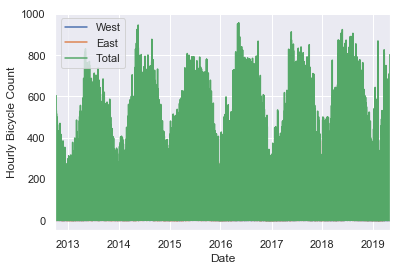

In [99]:
data.plot()
plt.ylabel('Hourly Bicycle Count')

将数据转换为更大的颗粒度，比如按周累计。

In [100]:
weekly = data.resample('W').sum()

Text(0,0.5,'Weekly bicycle count')

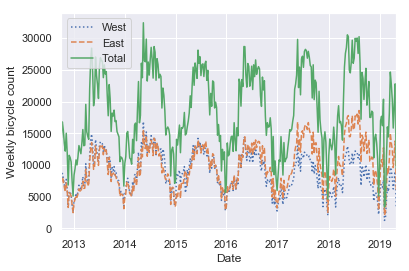

In [102]:
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')

In [107]:
daily = data.resample('D').sum()

Text(0,0.5,'mean of 30 days count')

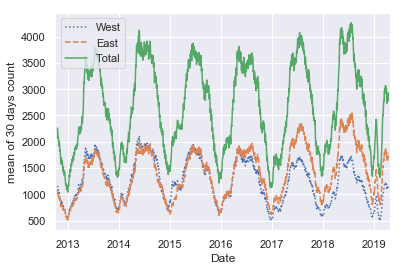

In [111]:
daily.rolling(30, center=True).mean().plot(style=[':', '--', '-'])
plt.ylabel('mean of 30 days count')

利用高斯分布时间窗口获得更平滑的图形。

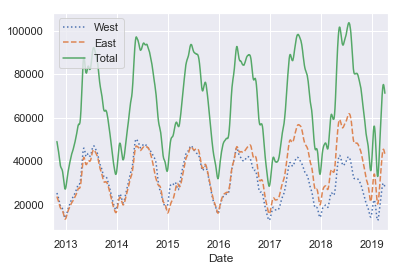

In [113]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])

2. 深入挖掘数据

观察单日内的小时均值流量。

In [114]:
by_time = data.groupby(data.index.time).mean()

In [117]:
hourly_ticks = 4 * 60 * 60 * np.arange(6)

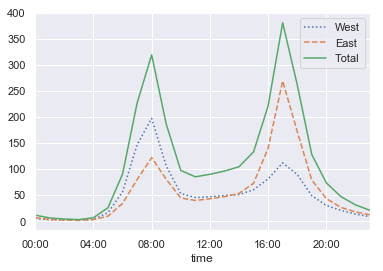

In [119]:
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

周内每天的变化情况。

In [121]:
by_weekday = data.groupby(data.index.dayofweek).mean()

In [123]:
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fir', 'Sat', 'Sun']

In [124]:
by_weekday

,West,East,Total
Mon,59.365646,69.845360,129.211006
Tues,64.035115,74.661725,138.696841
Wed,63.350583,73.816448,137.167031
Thurs,60.319485,69.356414,129.675899
Fir,54.378493,62.742163,117.120656
Sat,31.418975,29.842444,61.261419
Sun,30.540659,28.241400,58.782059


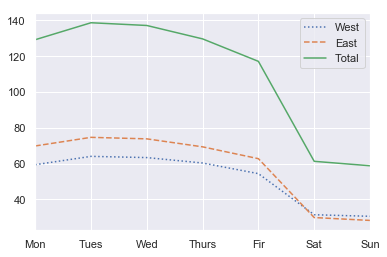

In [125]:
by_weekday.plot(style=[':', '--', '-'])

用一个符合groupby来观察一周内工作日与双休日每小时的数据。用一个标签标示双休日和工作日的不同小时。

In [126]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')

In [137]:
data.index.weekday[:50]

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 6, 6],
           dtype='int64', name='Date')

In [138]:
weekend[:50]

array(['Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekday',
       'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekday',
       'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekday',
       'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekday',
       'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekday',
       'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekday',
       'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekday',
       'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekday',
       'Weekend', 'Weekend'], dtype='<U7')

In [132]:
by_time = data.groupby([weekend, data.index.time]).mean()

In [143]:
data.index.time[:50]

array([datetime.time(23, 0), datetime.time(22, 0), datetime.time(21, 0),
       datetime.time(20, 0), datetime.time(19, 0), datetime.time(18, 0),
       datetime.time(17, 0), datetime.time(16, 0), datetime.time(15, 0),
       datetime.time(14, 0), datetime.time(13, 0), datetime.time(12, 0),
       datetime.time(11, 0), datetime.time(10, 0), datetime.time(9, 0),
       datetime.time(8, 0), datetime.time(7, 0), datetime.time(6, 0),
       datetime.time(5, 0), datetime.time(4, 0), datetime.time(3, 0),
       datetime.time(2, 0), datetime.time(1, 0), datetime.time(0, 0),
       datetime.time(23, 0), datetime.time(22, 0), datetime.time(21, 0),
       datetime.time(20, 0), datetime.time(19, 0), datetime.time(18, 0),
       datetime.time(17, 0), datetime.time(16, 0), datetime.time(15, 0),
       datetime.time(14, 0), datetime.time(13, 0), datetime.time(12, 0),
       datetime.time(11, 0), datetime.time(10, 0), datetime.time(9, 0),
       datetime.time(8, 0), datetime.time(7, 0), datetime.time

In [147]:
data.index[:50]

DatetimeIndex(['2019-04-30 23:00:00', '2019-04-30 22:00:00',
               '2019-04-30 21:00:00', '2019-04-30 20:00:00',
               '2019-04-30 19:00:00', '2019-04-30 18:00:00',
               '2019-04-30 17:00:00', '2019-04-30 16:00:00',
               '2019-04-30 15:00:00', '2019-04-30 14:00:00',
               '2019-04-30 13:00:00', '2019-04-30 12:00:00',
               '2019-04-30 11:00:00', '2019-04-30 10:00:00',
               '2019-04-30 09:00:00', '2019-04-30 08:00:00',
               '2019-04-30 07:00:00', '2019-04-30 06:00:00',
               '2019-04-30 05:00:00', '2019-04-30 04:00:00',
               '2019-04-30 03:00:00', '2019-04-30 02:00:00',
               '2019-04-30 01:00:00', '2019-04-30 00:00:00',
               '2019-04-29 23:00:00', '2019-04-29 22:00:00',
               '2019-04-29 21:00:00', '2019-04-29 20:00:00',
               '2019-04-29 19:00:00', '2019-04-29 18:00:00',
               '2019-04-29 17:00:00', '2019-04-29 16:00:00',
               '2019-04-

In [139]:
by_time.head()

West      East     Total
Weekday 00:00:00  4.264723  5.510204  9.774927
        01:00:00  2.210496  2.574344  4.784840
        02:00:00  1.631487  1.612245  3.243732
        03:00:00  1.448980  1.302041  2.751020
        04:00:00  4.259475  3.363848  7.623324

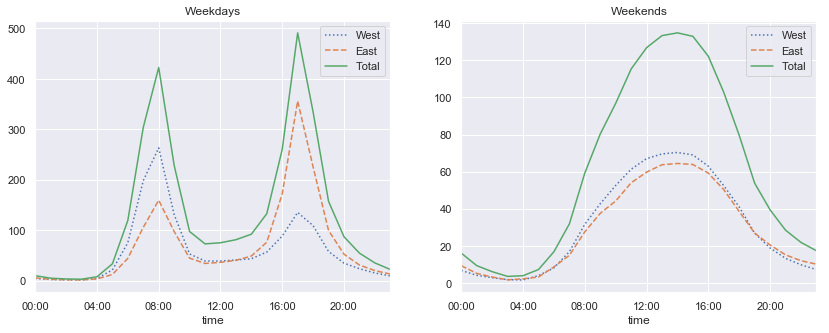

In [141]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=[':', '--', '-'])

**工作日与双休日每小时的自行车流量**